# Setting up DVC in a fastai project
> Using DVC to manage your data, training params, models, and metrics in a fastai project.

## Example: Pets breed classification dataset

This notebook is the [first lesson from the fastai's course](https://github.com/fastai/fastai2/blob/master/nbs/course/lesson1-pets.ipynb), but with tracking metrics with DVC. Before doing anything else, I wanted to make sure I can train a basic model with fastai2.

In [1]:
%matplotlib inline

In [2]:
from fastai2.vision.all import *
set_seed(2)

In [3]:
bs = 64

In [4]:
path = untar_data(URLs.PETS); path

Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames

(#7390) [Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/xnutsive/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [7]:
dls = ImageDataLoaders.from_name_re(
    path, fnames, pat=r'(.+)_\d+.jpg$', item_tfms=Resize(460), bs=bs,
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

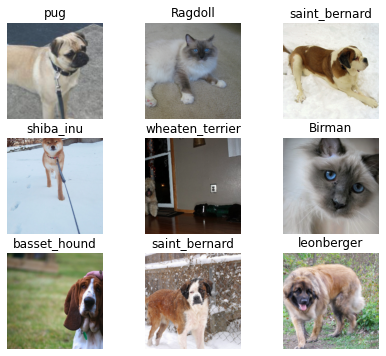

In [8]:
dls.show_batch(max_n=9, figsize=(7,6))

In [9]:
print(dls.vocab)
len(dls.vocab),dls.c

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]


(37, 37)

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.save('models/pets-resnet34-2epochs')